In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from imutils.video import VideoStream
import imutils
import sys
from scipy.stats import logistic

In [2]:
c=0

for filename in os.listdir("black_mask"):
    if(filename.endswith(".jpg")):
        img = Image.open("black_mask/"+filename).convert('L')
        img = img.resize((40,40))
        a = np.array(img)
        if(c==0):
            n=a.reshape(1,-1)
        else:    
            n= np.append(n,a.reshape(1,-1),axis=0)
        c+=1
yn=np.ones((c,1))

In [3]:
n.shape,yn.shape

((20, 1600), (20, 1))

In [4]:
d = 0
for filename in os.listdir("mask"):
    if(filename.endswith(".jpg")):
        img = Image.open("mask/"+filename).convert('L')
        a = np.array(img)
        if(d==0):
            m=a.reshape(1,-1)
        else:    
            m= np.append(m,a.reshape(1,-1),axis=0)
        d+=1
ym=np.ones((d,1))

In [5]:
m.shape,ym.shape

((34, 1600), (34, 1))

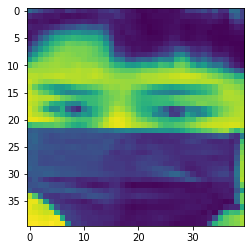

In [6]:
plt.imshow(n[5].reshape(40,40))

In [7]:
c=0

for filename in os.listdir("no_mask"):
    if(filename.endswith(".jpg")):
        img = Image.open("no_mask/"+filename).convert('L')
        a = np.array(img)
        n= np.append(n,a.reshape(1,-1),axis=0)
        m= np.append(m,a.reshape(1,-1),axis=0)
        c+=1
yn=np.append(yn,np.zeros((c,1)))
ym=np.append(ym,np.zeros((c,1)))

In [8]:
n.shape,yn.shape
#n = n[:,:1200]
#n.shape,yn.shape

((154, 1600), (154,))

In [9]:
m.shape,ym.shape
#m = m[:,:1200]

((168, 1600), (168,))

In [10]:
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize

In [11]:
#n_mod = normalize(n, norm='l2', axis=1, copy=True, return_norm=False)

In [12]:
n,yn = shuffle(n,yn)
m,ym = shuffle(m,ym)

In [13]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)

In [14]:
model = LogisticRegression()
model_black = LogisticRegression()

In [15]:
#n_mod[0]

In [ ]:
model.fit(m,ym)

<ipython-input-13-2910ac6fb6f5>:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-13-2910ac6fb6f5>:15: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
<ipython-input-13-2910ac6fb6f5>:15: RuntimeWarning: invalid value encountered in multiply
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


In [ ]:
model_black.fit(n,yn)

In [ ]:
model.score(m,ym)

In [ ]:
model_black.score(n,yn)

In [ ]:
imgTest = Image.open('test2.jpg').convert('L')
imgTest = imgTest.resize((40,40))

In [ ]:
plt.imshow(imgTest)

In [ ]:
xtest = np.array(imgTest).reshape(1,-1)

In [ ]:
#xtest_mod = normalize(xtest, norm='l2', axis=1, copy=True, return_norm=False)

In [ ]:
 if model.predict(xtest)[0] == 0:
    print("not wearing mask")
 else :
    print("wearing mask")

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
cap = cv2.VideoCapture(0)

while True:
    _, img = cap.read()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    arr= np.array(img)
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 1)
    
    
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
          detect = Image.fromarray(arr[y:y+h,x:x+w,], 'L')
          detect = detect.resize((40,40))
          detectArray = np.array(detect).reshape(1,-1)
          if model.predict(detectArray)[0] == 0:
             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
          else :
             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    # Display
    cv2.imshow('img', img)

    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
        
# Release the VideoCapture object
cap.release()

In [ ]:
prototxtPath = r"face_detector\deploy.prototxt.txt"
weightsPath = r"face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)
vs = VideoStream(src=0).start()

In [ ]:
while True:
    frame = vs.read()
    #frame = imutils.resize(frame, width=400)
    pil = np.array(frame)
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),(104.0, 177.0, 123.0))


    faceNet.setInput(blob)
    detections = faceNet.forward()


    faces = []
    locs = []
    preds = []
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.15:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
            #cv2.rectangle(frame, (startX, startY), (endX, endY), (255,0,0), 2)
            if(startX<h and endX<h and startY < w and endY<w):
                detect = Image.fromarray(pil[startY:endY,startX:endX,], 'RGB')
                detect = detect.convert('L')
                detect = detect.resize((40,40))
                detectArray = np.array(detect).reshape(1,-1)
               # detectArray = detectArray[:,:1200]
                if  model_black.predict(detectArray)[0] == 0  :
                    cv2.rectangle(frame, (startX, startY), (endX, endY), (255,0,0), 2)
                    cv2.putText(frame, "No Mask", (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255,0,0), 2)
                else :
                    cv2.rectangle(frame, (startX, startY), (endX, endY), (0,255,0), 2)
                    cv2.putText(frame, "Mask", (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,255,0), 2)
    
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break